# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=8).fit(X) #create the model and fit it

In [11]:
y_pred = kmeans.predict(X) #tenemos el predict de los valores y

In [13]:
from sklearn.metrics import silhouette_score
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y_pred))) #computamos el valor de la silueta

Model 1 Silhouette Score: 0.5406824747857625


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [14]:
kmeans5 = KMeans(n_clusters=5).fit(X) #create the model and fit it
y_pred5 = kmeans5.predict(X)
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y_pred5)))

Model 2 Silhouette Score: 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [15]:
kmeans3 = KMeans(n_clusters=3).fit(X) #create the model and fit it
y_pred3 = kmeans3.predict(X)
print("Model 3 Silhouette Score: {}".format(silhouette_score(X, y_pred3)))

Model 3 Silhouette Score: 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [18]:
from yellowbrick.cluster import KElbowVisualizer

In [20]:
help(KElbowVisualizer) #OBTENER AYUDA

Help on class KElbowVisualizer in module yellowbrick.cluster.elbow:

class KElbowVisualizer(yellowbrick.cluster.base.ClusteringScoreVisualizer)
 |  KElbowVisualizer(model, ax=None, k=10, metric='distortion', timings=True, locate_elbow=True, **kwargs)
 |  
 |  The K-Elbow Visualizer implements the "elbow" method of selecting the
 |  optimal number of clusters for K-means clustering. K-means is a simple
 |  unsupervised machine learning algorithm that groups data into a specified
 |  number (k) of clusters. Because the user must specify in advance what k to
 |  choose, the algorithm is somewhat naive -- it assigns all members to k
 |  clusters even if that is not the right k for the dataset.
 |  
 |  The elbow method runs k-means clustering on the dataset for a range of
 |  values for k (say from 1-10) and then for each value of k computes an
 |  average score for all clusters. By default, the ``distortion`` score is
 |  computed, the sum of square distances from each point to its assign

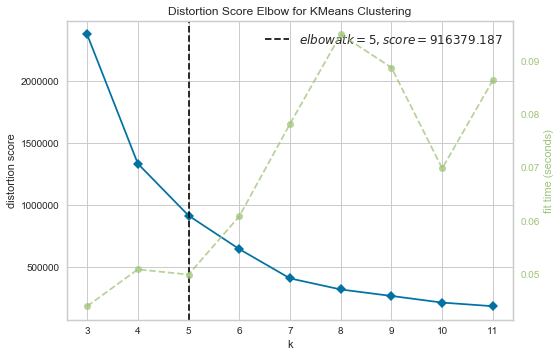

In [25]:
from sklearn.cluster import KMeans

#Primera forma de ver: distortion
model = KMeans() #CREAMOS MODELOS
visualizer = KElbowVisualizer(model, k=(3,12)) #k ES EL NUMERO DE CLUSTERS QUE PROBARÁ. ESTE NÚMERO ES ERROR & TRIAL
visualizer.fit(X) #LE DICES QUE VA A VISUALIZAR
visualizer.poof(); #LO MUESTRA

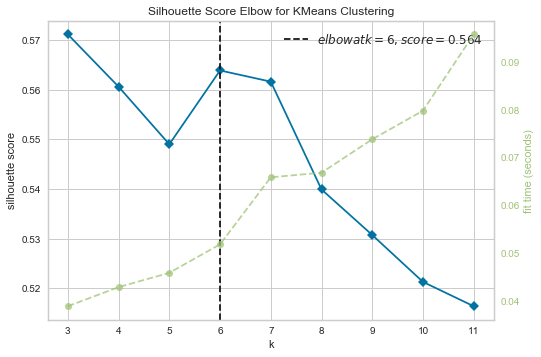

In [26]:
#Segunda forma de ver: silueta
model = KMeans() #CREAMOS MODELOS
visualizer = KElbowVisualizer(model, metric = "silhouette", k=(3,12)) #k ES EL NUMERO DE CLUSTERS QUE PROBARÁ. ESTE NÚMERO ES ERROR & TRIAL
visualizer.fit(X) #LE DICES QUE VA A VISUALIZAR
visualizer.poof(); #LO MUESTRA

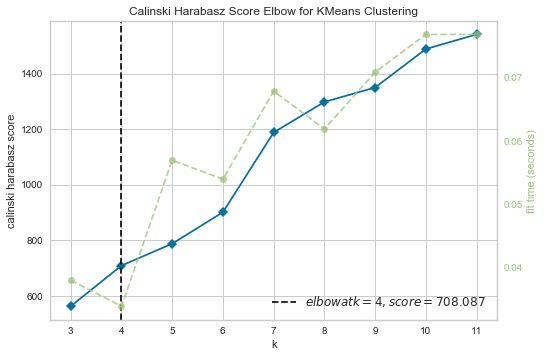

In [27]:
#Segunda forma de ver: silueta
model = KMeans() #CREAMOS MODELOS
visualizer = KElbowVisualizer(model, metric = "calinski_harabasz", k=(3,12)) #k ES EL NUMERO DE CLUSTERS QUE PROBARÁ. ESTE NÚMERO ES ERROR & TRIAL
visualizer.fit(X) #LE DICES QUE VA A VISUALIZAR
visualizer.poof(); #LO MUESTRA

In [ ]:
#Aqui tengo duda, no sé cómo interpretar ests gráficas.En distortion tenemos tres puntos de influexión (5, 8 y 10)
#En silueta tenemos 8
#Mientras en calinski_harabasz no parece haber ninguno.
#¿Qué significa?

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [36]:
from sklearn import cluster, datasets
single = cluster.AgglomerativeClustering(n_clusters=8, linkage='single').fit(X)
y_single = single.labels_.astype(np.int)

print("Model 1B Silhouette Score: {}".format(silhouette_score(X, y_single)))

Model 1B Silhouette Score: 0.4231857440030851


In [37]:
single5 = cluster.AgglomerativeClustering(n_clusters=5, linkage='single').fit(X)
y_single5 = single5.labels_.astype(np.int)

print("Model 2B Silhouette Score: {}".format(silhouette_score(X, y_single5)))

Model 2B Silhouette Score: -0.0262784249916707


In [38]:
single3 = cluster.AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
y_single3 = single3.labels_.astype(np.int)

print("Model 3B Silhouette Score: {}".format(silhouette_score(X, y_single3)))

Model 3B Silhouette Score: 0.48798203351890657


In [ ]:
#En general, los tres modelos para numero de cluster (8,5,3) son menores usando AgglomerativeClustering
#que si usaras KMeans

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [ ]:
#El modelo que tuvo un score más alto fue KMeans con 3 clusters

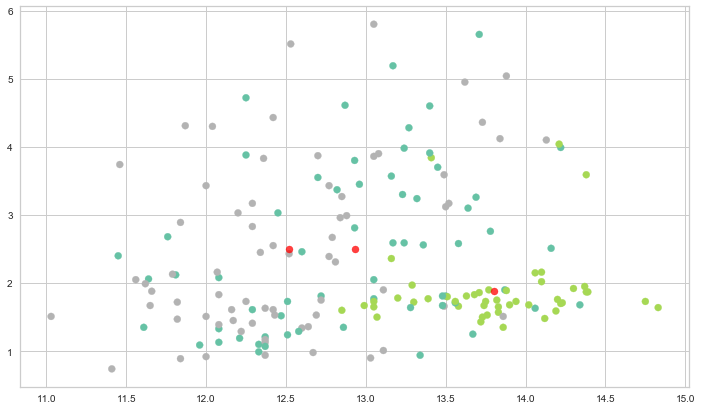

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) #quedamos que tres era el mejor número 
kmeans.fit(X) #hacemos el fit
y_pred = kmeans.predict(X) #obtenemos valores predecidos

plt.figure(figsize=(12,7)) #ajustamos tamaño de la grafica
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y_pred, cmap="Set2") #ploteamos

centers = kmeans.cluster_centers_ #que aparezcan los centros de los clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75) #esta es la manera en que lo logra

plt.show();


In [52]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

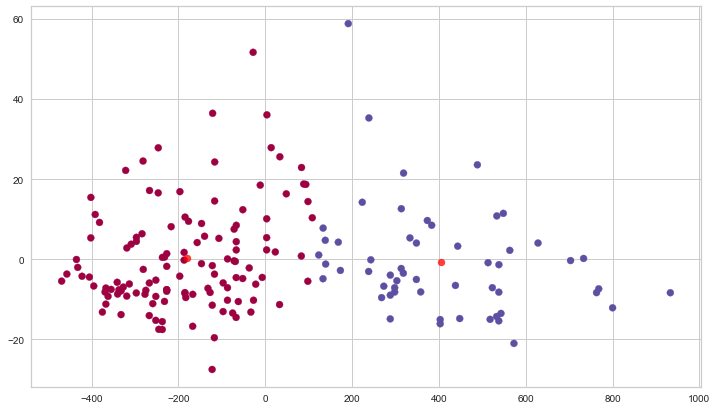

In [61]:
#from sklearn.datasets import make_blobs
#from mpl_toolkits.mplot3d import Axes3D
#from scipy.spatial.transform import Rotation as R
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)#CREAMOS EL COMPONENTE
pca_X = pca.transform(X) #LO TRANSFORMA EN PCA

kmeans = KMeans(n_clusters=2) #CLUSTERIZAMOS EN DOS 
kmeans.fit(pca_X) #APLICAMOS A PCA
y_pred = kmeans.predict(pca_X) #HACEMOS EL PREDICT

plt.figure(figsize=(12,7))
plt.scatter(pca_X[:,0], pca_X[:,1], c=y_pred, cmap="Spectral") #plotea

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.75) #pone centros

plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

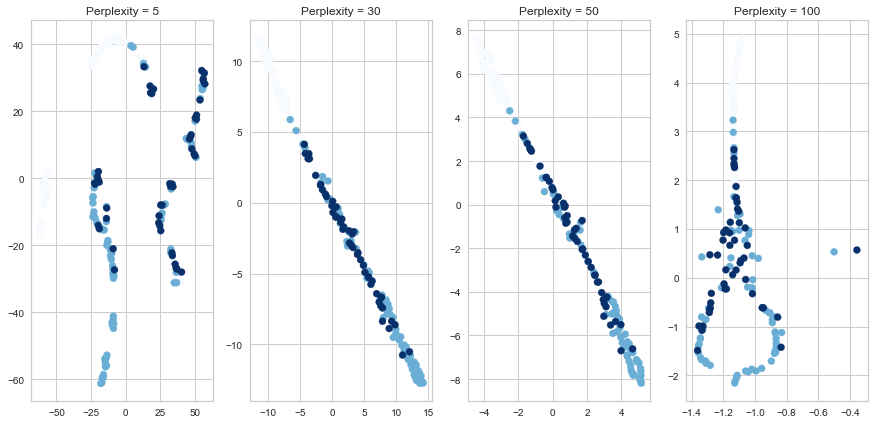

In [64]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y, cmap="Blues")
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show();